# Quando comemorar uma vantagem em uma partida da NBA?

Para tentar responder isso vamos usar uma [API client](https://github.com/swar/nba_api) bem interessante que organizou todos os endpoints da NBA Stats

O primeiro passo é usar o endpoint __teams__ para acharmos o ID do time que queremos analisar

In [173]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()

team = [team for team in nba_teams if team['abbreviation'] == 'MIA'][0]
time_id = team['id']

Com o ID do time, podemos utilizar outro endpoint chamado __leaguegamefinder__ para puxarmos todos os dados dos jogos 

In [174]:
from nba_api.stats.endpoints import leaguegamefinder

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=time_id)

games = gamefinder.get_data_frames()[0]

### Filtra apenas os jogos da temporada 2019-2020 e mais os jogos da "pré-temporada da bolha"
games_2020 = games.loc[(games.SEASON_ID=='42019')|(games.SEASON_ID=='22019')] 

games_2020.head(10)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42019,1610612748,MIA,Miami Heat,0041900304,2020-09-23,MIA vs. BOS,W,240,112,...,0.889,10,30,40,20,9,2,8,20,1.2
1,42019,1610612748,MIA,Miami Heat,0041900303,2020-09-19,MIA vs. BOS,L,239,106,...,0.824,12,30,42,21,5,8,13,24,-11.0
2,42019,1610612748,MIA,Miami Heat,0041900302,2020-09-17,MIA @ BOS,W,238,106,...,0.857,11,27,38,27,11,2,9,19,5.0
3,42019,1610612748,MIA,Miami Heat,0041900301,2020-09-15,MIA @ BOS,W,265,117,...,0.750,7,34,41,32,6,6,12,23,3.0
4,42019,1610612748,MIA,Miami Heat,0041900205,2020-09-08,MIA @ MIL,W,241,103,...,0.917,5,43,48,21,6,7,21,21,9.0
5,42019,1610612748,MIA,Miami Heat,0041900204,2020-09-06,MIA vs. MIL,L,266,115,...,0.900,6,35,41,33,8,1,15,18,-3.0
6,42019,1610612748,MIA,Miami Heat,0041900203,2020-09-04,MIA vs. MIL,W,240,115,...,0.794,9,40,49,27,3,6,11,19,15.0
7,42019,1610612748,MIA,Miami Heat,0041900202,2020-09-02,MIA @ MIL,W,241,116,...,0.781,7,31,38,22,12,4,10,26,2.0
8,42019,1610612748,MIA,Miami Heat,0041900201,2020-08-31,MIA @ MIL,W,241,115,...,0.926,12,34,46,21,8,2,16,23,11.0
9,42019,1610612748,MIA,Miami Heat,0041900134,2020-08-24,MIA vs. IND,W,240,99,...,0.786,17,43,60,24,8,4,13,12,12.0


In [175]:
### Nos diz quantos jogos estao dentro do dataframe
len(games_2020)

94

Podemos utilizar a coluna 'GAME ID' como identificador unico para outras informações de diferentes endpoint e os dados da coluna 'MATCH UP' serão muito úteis em passos futuros

In [176]:
allgames = games_2020['GAME_ID']
matchups = games_2020['MATCHUP']

allgames = allgames.values
matchups = matchups.values

Um endpoint bastante útil é o __playbyplay__, que consiste em uma descrição detalhada de todos os eventos e ações do jogo. Podemos acesssar o dataframe gerado pela sua classe atraves do codigo abaixo:

In [177]:
from nba_api.stats.endpoints import playbyplay

request = playbyplay.PlayByPlay(game_id=games_2020.GAME_ID[0])
playbyplay_1stexe = request.get_data_frames()[0]

playbyplay_1stexe

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN
0,0041900304,2,12,0,1,8:46 PM,12:00,None,None,None,None,None
1,0041900304,4,10,0,1,8:46 PM,12:00,Jump Ball Adebayo vs. Theis: Tip to Crowder,None,None,None,None
2,0041900304,7,1,105,1,8:46 PM,11:40,Butler 8' Turnaround Fadeaway Bank Jump Shot (...,None,None,0 - 2,2
3,0041900304,8,1,66,1,8:46 PM,11:24,None,None,Smart 11' Jump Bank Shot (2 PTS),2 - 2,TIE
4,0041900304,63,2,6,1,8:47 PM,11:13,MISS Butler 4' Driving Layup,None,Tatum BLOCK (1 BLK),None,None
5,0041900304,65,4,0,1,8:47 PM,11:12,HEAT Rebound,None,None,None,None
6,0041900304,10,1,63,1,8:47 PM,11:00,Adebayo 10' Fadeaway Jumper (2 PTS) (Crowder 1...,None,None,2 - 4,2
7,0041900304,12,2,101,1,8:47 PM,10:44,None,None,MISS Tatum 8' Driving Floating Jump Shot,None,None
8,0041900304,13,4,0,1,8:47 PM,10:43,Butler REBOUND (Off:0 Def:1),None,None,None,None
9,0041900304,14,2,80,1,8:48 PM,10:21,MISS Dragic 15' Step Back Jump Shot,None,None,None,None


Essa coluna traz a informação de toda a margem de vantagem, jogada por jogada

In [178]:
playbyplay_1stexe.SCOREMARGIN[0:15] # MIA vs. BOS

0     None
1     None
2        2
3      TIE
4     None
5     None
6        2
7     None
8     None
9     None
10    None
11    None
12    None
13       4
14       2
Name: SCOREMARGIN, dtype: object

Note que a informação de mando de quadra ('vs' ou '@') é bastante relevante pois ela muda o sinal da vantagem. Iremos corrigir esse pequeno problema mais pra frente

In [179]:
request = playbyplay.PlayByPlay(game_id=games_2020.GAME_ID[2]) # MIA @ BOS
playbyplay_2ndexe = request.get_data_frames()[0]

playbyplay_2ndexe.SCOREMARGIN[0:15]

0     None
1     None
2        3
3     None
4     None
5     None
6      TIE
7     None
8        1
9        2
10      -1
11    None
12    None
13    None
14      -4
Name: SCOREMARGIN, dtype: object

Uma estratégica possível para juntarmos os dois dataframes seria a criação de um loop utilizando as informações salvas nas listas acima salvando os resultados numa outra lista

In [180]:
list_ids = []
list_values = []

for i in range(40):

    request = playbyplay.PlayByPlay(game_id=allgames[i])

    playbyplay_df = request.get_data_frames()[0]
    
    print('loaded data frame '+str(i+1)+'/40')
    
    list_ids.append(allgames[i])
    
    for x in range(1, 21):
        
        value_home = playbyplay_df.SCOREMARGIN.loc[playbyplay_df.SCOREMARGIN == str(x)].count()
        value_away = playbyplay_df.SCOREMARGIN.loc[playbyplay_df.SCOREMARGIN == str((x*-1))].count()
        
        if matchups[i].find('@') > 0:
            
            list_values.append(value_away)
        
        else:
            
            list_values.append(value_home)

loaded data frame 1/40
loaded data frame 2/40
loaded data frame 3/40
loaded data frame 4/40
loaded data frame 5/40
loaded data frame 6/40
loaded data frame 7/40
loaded data frame 8/40
loaded data frame 9/40
loaded data frame 10/40
loaded data frame 11/40
loaded data frame 12/40
loaded data frame 13/40
loaded data frame 14/40
loaded data frame 15/40
loaded data frame 16/40
loaded data frame 17/40
loaded data frame 18/40
loaded data frame 19/40
loaded data frame 20/40
loaded data frame 21/40
loaded data frame 22/40
loaded data frame 23/40
loaded data frame 24/40
loaded data frame 25/40
loaded data frame 26/40
loaded data frame 27/40
loaded data frame 28/40
loaded data frame 29/40
loaded data frame 30/40
loaded data frame 31/40
loaded data frame 32/40
loaded data frame 33/40
loaded data frame 34/40
loaded data frame 35/40
loaded data frame 36/40
loaded data frame 37/40
loaded data frame 38/40
loaded data frame 39/40
loaded data frame 40/40


Vale a pena comentar que em algumas tentativas de coletar muitos dataframes de uma vez, eu me deparei com erros de timeout. Podemos otimizar bastante a forma de puxar esses dados mas para esse exemplo, defini um limite de 40 jogos, que acredito ser uma amostra interessante

Feito isso, podemos montar um segundo dataframe auxiliar

In [181]:
import numpy as np
import pandas as pd

df_margin_score = pd.DataFrame()

list_split = np.array_split(list_values, len(list_ids))
for array in list_split:
    df_margin_score = df_margin_score.append([array])
    
df_margin_score.columns = ['pt1','pt2','pt3','pt4','pt5','pt6','pt7','pt8','pt9','pt10',
                           'pt11','pt12','pt13','pt14','pt15','pt16','pt17','pt18','pt19','pt20']

df_margin_score['GAME_ID'] = allgames[0:40]

df_margin_score.head()

,pt1,pt2,pt3,pt4,pt5,pt6,pt7,pt8,pt9,pt10,...,pt12,pt13,pt14,pt15,pt16,pt17,pt18,pt19,pt20,GAME_ID
0,16,20,18,16,10,14,7,8,4,2,...,2,0,0,0,0,0,0,0,0,0041900304
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0041900303
0,9,6,6,3,8,3,6,2,0,0,...,0,0,0,0,0,0,0,0,0,0041900302
0,8,5,8,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0041900301
0,2,2,6,5,13,12,16,14,8,2,...,1,0,0,0,0,0,0,0,0,0041900205


Que podemos dar "merge" com nosso dataframe original

In [182]:
games_merged = pd.merge(games_2020,df_margin_score, on='GAME_ID')
games_merged.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,pt11,pt12,pt13,pt14,pt15,pt16,pt17,pt18,pt19,pt20
0,42019,1610612748,MIA,Miami Heat,0041900304,2020-09-23,MIA vs. BOS,W,240,112,...,1,2,0,0,0,0,0,0,0,0
1,42019,1610612748,MIA,Miami Heat,0041900303,2020-09-19,MIA vs. BOS,L,239,106,...,0,0,0,0,0,0,0,0,0,0
2,42019,1610612748,MIA,Miami Heat,0041900302,2020-09-17,MIA @ BOS,W,238,106,...,0,0,0,0,0,0,0,0,0,0
3,42019,1610612748,MIA,Miami Heat,0041900301,2020-09-15,MIA @ BOS,W,265,117,...,0,0,0,0,0,0,0,0,0,0
4,42019,1610612748,MIA,Miami Heat,0041900205,2020-09-08,MIA @ MIL,W,241,103,...,1,1,0,0,0,0,0,0,0,0


Agora que temos os dados numa base única, podemos começar algumas análises. Vamos observar primeiro o W-L% geral:

In [183]:
win_pct1 = games_merged.loc[(games_merged.WL == 'W')].count()
win_pct2 = games_merged.loc[(games_merged.WL == 'L')].count()

win_pct = win_pct1.WL/(win_pct1.WL+win_pct2.WL)
win_pct

0.575

Para termos essa mesma informação discriminada por margem de vantagem, teremos que filtrar o dataframe da seguinte maneira e salvarmos o resultado em outra lista

In [184]:
winpct_per_margin = []
for i in range(28,48):
    
    df_temp = games_merged.loc[(games_merged.iloc[:, i]>0)]

    win_pct_temp = (df_temp.loc[(games_merged.WL == 'W')].count()) / ((df_temp.loc[(games_merged.WL == 'W')].count())+
                                                                         (df_temp.loc[(games_merged.WL == 'L')].count()))
    winpct_per_margin.append(win_pct_temp[0])       

Para visualizar o resultado, podemos criar outro df e gerar um gráfico de linha:

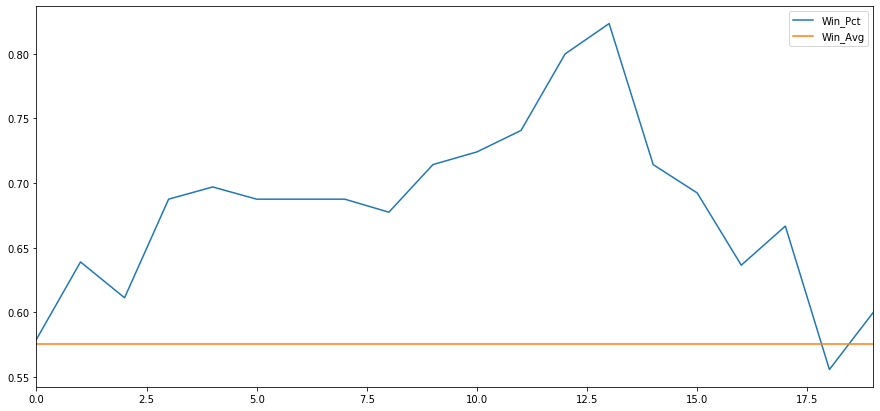

In [188]:
graph_df = pd.DataFrame()
graph_df['Margin_Score'] = ['pt1','pt2','pt3','pt4','pt5','pt6','pt7','pt8','pt9','pt10',
                           'pt11','pt12','pt13','pt14','pt15','pt16','pt17','pt18','pt19','pt20']

graph_df['Win_Pct'] = winpct_per_margin

graph_df['Win_Avg'] = win_pct

graph_df.plot.line(figsize=(15,7))

Outra opção um pouco mais charmosa, seria utilizarmos a lib do [Ploty](https://plotly.com/python/)

In [186]:
import plotly.express as px

fig = px.line(graph_df, x="Margin_Score", y="Win_Pct", title='Win % by Margin of Score')
fig.show()

O Miami Heat, apesar do seu excelente time e ótimas performances nos ultimos jogos dos Playoffs, parece não lidar de uma forma tão positiva com vantagens acima de 14 pts. Quando o Heat chegou a abrir até 18pts em uma partida, teve algo como 66% de aproveitamento, não muito distante dos 57,5% de média geral. Para efeito de comparação, todos os times presentes nas finais de conferencia possuem padrões diferentes:

![imagem](graph.jpg)

Por último, sempre temos a opção de exportar um CSV para futuras análises

In [189]:
games_merged.to_csv('games_merged.csv',index=False)